In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
#%%
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
data = pd.read_csv(r"Salary_Data.csv") # real
data.tail()
# data.info()
# data.describe()

YearsExperience    Salary
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

<Figure size 300x300 with 0 Axes>

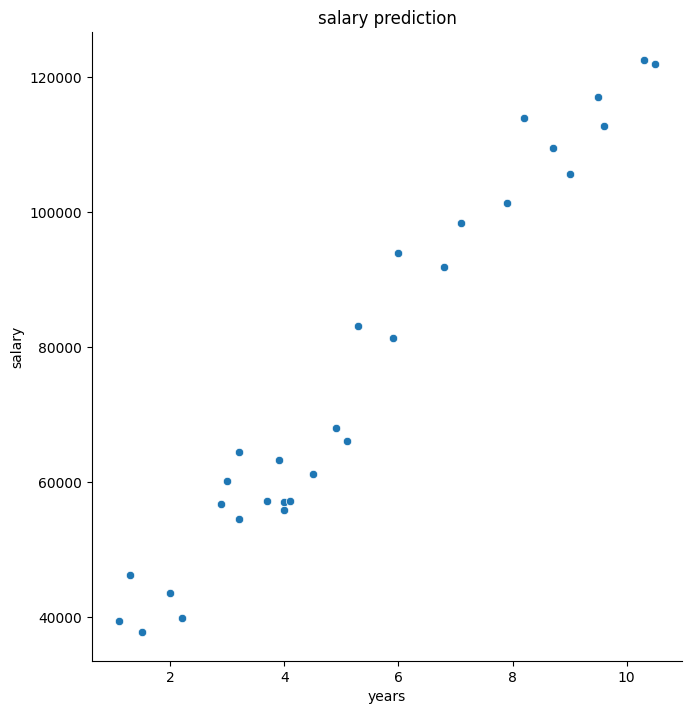

In [4]:
#%%
plt.figure(figsize=(3,3))
sns.pairplot(data,x_vars=["YearsExperience"],y_vars=["Salary"],size=7,kind="scatter")
plt.xlabel("years")
plt.ylabel("salary")
plt.title("salary prediction")
plt.show()

In [5]:
#%%
# cooking the data 
X = data.iloc[:,:-1]
y = data.iloc[:,1]

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.8,random_state = 10)

In [6]:
my_model = LinearRegression()
my_model.fit(X_train,y_train)

LinearRegression()

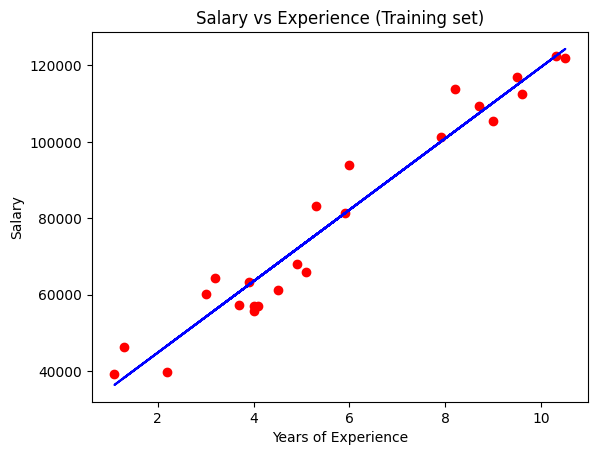

In [7]:
#%%
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, my_model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

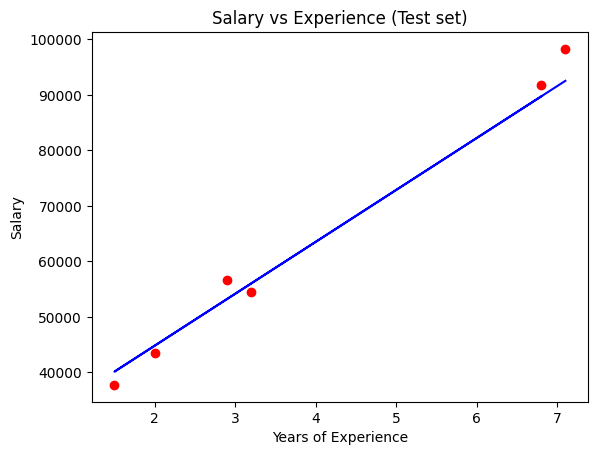

In [8]:
#%%
y_pred = my_model.predict(X_test)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
#%%

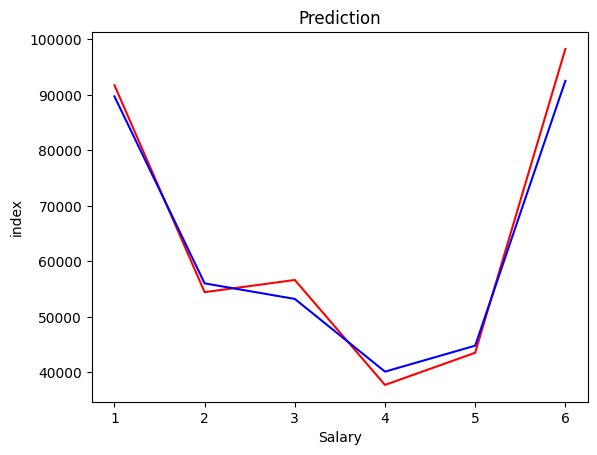

In [9]:
# Plotting the actual and predicted values

c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

In [10]:
# calculate Mean square error
mse = mean_squared_error(y_test,y_pred)
# Calculate R square vale
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)
#%%
# Intecept and coeff of the line
print('Intercept of the model:',my_model.intercept_)
print('Coefficient of the line:',my_model.coef_)

y_hat = 9357 * 7 +  26089 
print(y_hat)

mean squared error : 9785570.138914317
r square : 0.9816423482070253
Intercept of the model: 26089.096632416724
Coefficient of the line: [9356.86299354]
91588


In [11]:
x=int(input("pls inter your years experience"))
y_hat = 9357 * x +  26089 
y_hat

213229

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib  # For saving the model

# Load your dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('Salary_Data.csv')

# Train the model
X = data[['YearsExperience']]  # Feature
y = data['Salary']  # Target
model = LinearRegression()
model.fit(X, y)

# Save the model
joblib.dump(model, 'salary_model.pkl')

['salary_model.pkl']

In [13]:
import tkinter as tk
from tkinter import messagebox
import joblib

# Load the trained model
model = joblib.load('salary_model.pkl')

# Function to predict salary
def predict_salary():
    try:
        years = float(entry.get())
        prediction = model.predict([[years]])[0]
        result_label.config(text=f"Your Expected Salary is: {int(prediction)}")
    except Exception as e:
        messagebox.showerror("Error", "Invalid input. Please enter a valid number.")



In [14]:
# Create the GUI
root = tk.Tk()
root.title("Salary Prediction App")
root.geometry("1350x700")  # Set window size
root.configure(bg="pink")  # Set background color


label = tk.Label(root, text="Enter years of experience",font=("times new roman", 20, "bold"))
label.pack()

entry = tk.Entry(root)
entry.pack()

button = tk.Button(root, text="Execute",font=("times new roman",16, "bold"), command=predict_salary)
button.pack()
result_label = tk.Label(root, text="Your Expected Salary is",font=("times new roman",16, "bold"))
result_label.pack()

root.mainloop()